In [3]:
import pyzbar.pyzbar as pyzbar
import cv2
import matplotlib.pyplot as plt

## QR 코드
- Download Zbar: <http://zbar.sourceforge.net/download.html>

#### 1. 이미지 로드

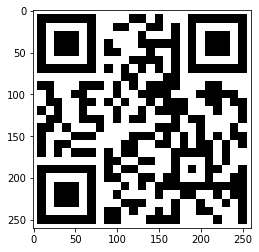

In [4]:
img = cv2.imread('data/qr.png')

plt.imshow(img)

#### 2. 이미지를 GrayScale로 변환

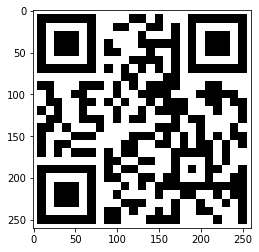

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)       # 이미지를 GRAY로 (원래는 BGR 3채널 -> GRAY 1채널)

plt.imshow(gray, cmap='gray')

#### 3. pyzbar으로 디코드

In [9]:
decoded = pyzbar.decode(gray)     # pyzbar를 이용해 decode

decoded    # data:qr코드 주소, rect:사각형 좌표, polygon:QR코드 외곽을 이은것

[Decoded(data=b'http://ebook.nowon.kr', type='QRCODE', rect=Rect(left=7, top=7, width=247, height=247), polygon=[Point(x=7, y=7), Point(x=7, y=252), Point(x=254, y=254), Point(x=252, y=7)])]

![11](./data/11.PNG)

b'http://ebook.nowon.kr'
http://ebook.nowon.kr
QRCODE


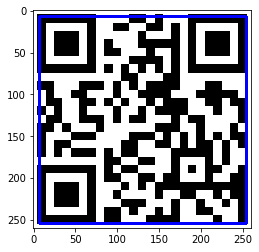

In [16]:
for d in decoded:    # 바코드가 여러개 있을경우도 있음.
    print(d.data)     # b'http://ebook.nowon.kr'  -> ByteArray로 되어있어서 주소앞에 b 가 붙는다. 
    print(d.data.decode('utf-8'))    # http://ebook.nowon.kr (정상출력)
    print(d.type)     # type:QRCODE
    
    # cv2.rectangle(): 이미지(img)에 '사각형틀'을 그린다.
    cv2.rectangle(img, (d.rect[0], d.rect[1]), (d.rect[0] + d.rect[2], d.rect[1] + d.rect[3])
                  , (0,0,255), 2)      # rectangle(img, pt1, pt2, color, thickness)
                                       # pt1 : 좌상단 좌표
                                       # pt2 : 우하단 좌표
            
plt.imshow(img)

In [13]:
# cv2.rectangle?

## 바코드

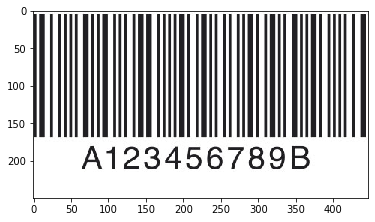

In [17]:
img = cv2.imread('data/b.jpg')

plt.imshow(img)

In [18]:
# 바코드 역시 똑같은 과정